# Estudo de Caso: Regressão Linear

In [367]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Para uma variável (2D)

### Etapa 1: Entrada de Dados

In [368]:
filename = 'ex1data2.txt'
df = pd.read_csv(filename,header=None,names=['Area','Quartos','Preço'])

In [369]:
df.head()

,Area,Quartos,Preço
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [370]:
df.tail()

,Area,Quartos,Preço
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


Definindo variáveis de apoio apenas para ajudar nos plots:

In [371]:
varX1 = 'Area'
varX2 = 'Quartos'
varY = 'Preço'

X1 = df[varX1].values
X2 = df[varX2].values
y = df[varY].values

# número de amostras
m = y.size

# número de features
n = 2

### Etapa 2: Visualização Inicial

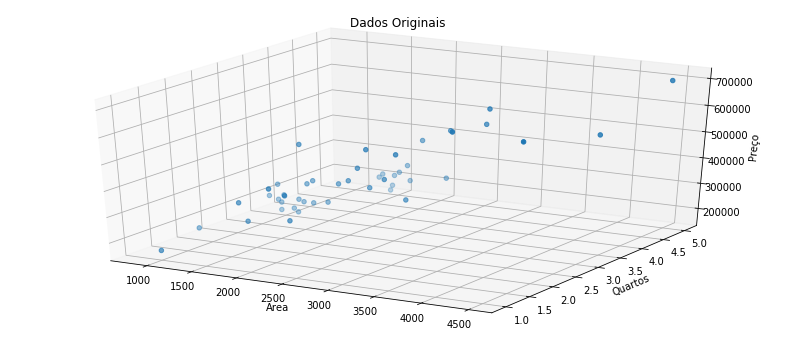

In [372]:
fig = plt.figure(figsize=(14,6))

ax = plt.axes(projection='3d')
ax.set_title('Dados Originais')
ax.set_xlabel(varX1)
ax.set_ylabel(varX2)
ax.set_zlabel(varY)
ax.scatter3D(X1, X2, y);

Não ficou bom de ver... Resolvi plotar 2 grandezas por vez...

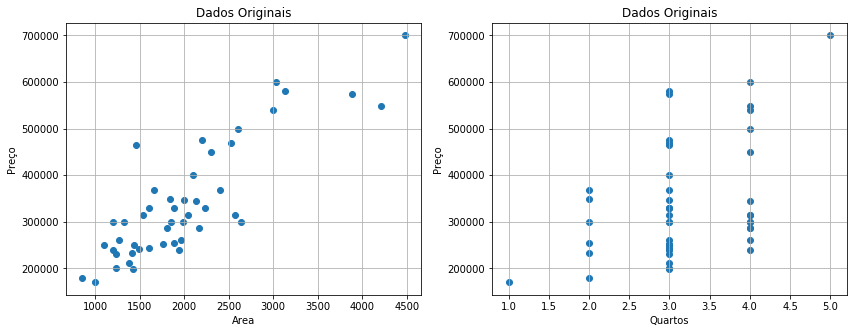

In [373]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Dados Originais')
plt.grid()
plt.xlabel(varX1)
plt.ylabel(varY)
plt.scatter(X1, y)

plt.subplot(1,2,2)
plt.title('Dados Originais')
plt.grid()
plt.xlabel(varX2)
plt.ylabel(varY)
plt.scatter(X2, y)

plt.show()

### Etapa 3: Ajuste Manual

In [374]:
# Construção de X

X = np.ones((m,n+1))
X[:,1] = X1
X[:,2] = X2
print(X[:5,:])

# X      *    w       =   yest
# m x 3       3 x 1       m x 1

[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]]


In [376]:
# Construção de y

y = y.reshape((m,1))
print(y[:5])

[[399900]
 [329900]
 [369000]
 [232000]
 [539900]]


In [380]:
# Construção de w

w = np.array([[y.mean(),0,0]]).T
print(w)

[[340412.65957447]
 [     0.        ]
 [     0.        ]]


In [381]:
yest = X.dot(w) # yest = X * w

In [382]:
print(yest[:5])

[[340412.65957447]
 [340412.65957447]
 [340412.65957447]
 [340412.65957447]
 [340412.65957447]]


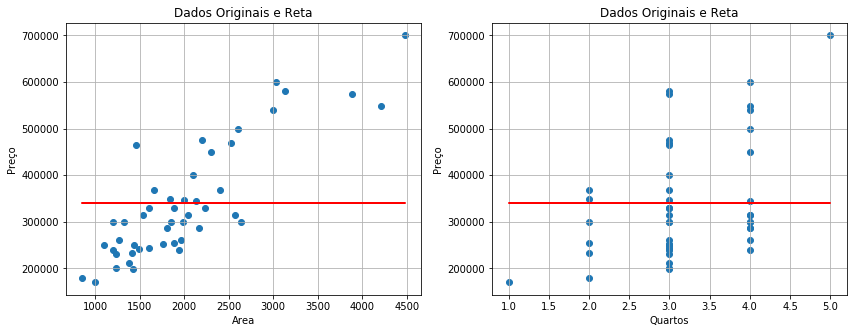

In [383]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Dados Originais e Reta')
plt.grid()
plt.xlabel(varX1)
plt.ylabel(varY)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yest, color='red')

plt.subplot(1,2,2)
plt.title('Dados Originais e Reta')
plt.grid()
plt.xlabel(varX2)
plt.ylabel(varY)
plt.scatter(X[:,2], y)
plt.plot(X[:,2], yest, color='red')

plt.show()

### Etapa 4: Função de Perdas

Qual o erro cometido usando o ajuste manual?

In [384]:
yest = X.dot(w)
erro = yest - y
erro[:10]

array([[ -59487.34042553],
       [  10512.65957447],
       [ -28587.34042553],
       [ 108412.65957447],
       [-199487.34042553],
       [  40512.65957447],
       [  25512.65957447],
       [ 141413.65957447],
       [ 128412.65957447],
       [  97912.65957447]])

In [385]:
fp = (erro**2).mean()/2
fp

7651158707.176097

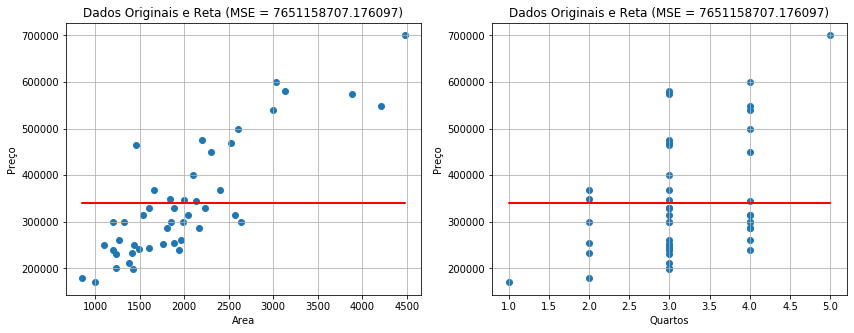

In [386]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title(f'Dados Originais e Reta (MSE = {fp})')
plt.grid()
plt.xlabel(varX1)
plt.ylabel(varY)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yest, color='red')

plt.subplot(1,2,2)
plt.title(f'Dados Originais e Reta (MSE = {fp})')
plt.grid()
plt.xlabel(varX2)
plt.ylabel(varY)
plt.scatter(X[:,2], y)
plt.plot(X[:,2], yest, color='red')

plt.show()

### Etapa 5: Gradient Descent

In [387]:
def calcula_Jw(X, y, w):
  yest = X.dot(w)
  erro = yest - y
  return (erro**2).mean()/2

In [388]:
def calcula_iteracoes_GD(X, y, w, alpha, iters):
  
  m = y.size
  mem_Jw = np.zeros((iters,1))
  
  for iter in range(iters):
    yest = X.dot(w)
    w = w - (alpha/m) * (X.T).dot(yest - y)
    mem_Jw[iter] = calcula_Jw(X, y, w)
    
  return w, mem_Jw

In [390]:
# Teste

w = np.array([[y.mean(),0,0]]).T
alpha = 0.001
iters = 100
w,mem_Jw = calcula_iteracoes_GD(X, y, w, alpha, iters)
print(f'w = \n{w}')

w = 
[[nan]
 [nan]
 [nan]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


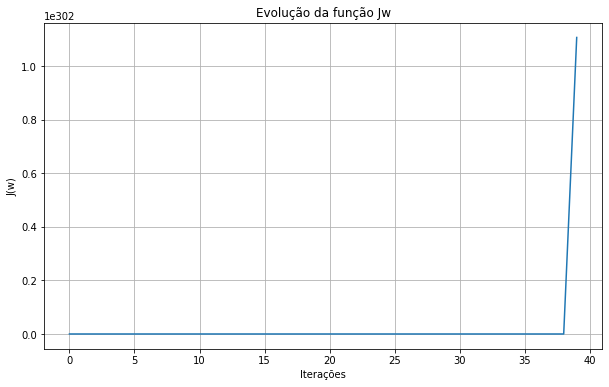

In [391]:
# Evolução

fig = plt.figure(figsize=(10,6))
plt.title(f'Evolução da função Jw')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('J(w)')
plt.plot(range(iters), mem_Jw)
plt.show()

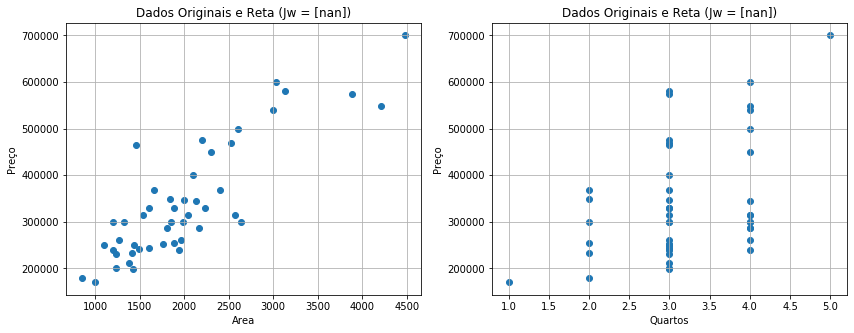

In [392]:
yest = X.dot(w)

fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title(f'Dados Originais e Reta (Jw = {mem_Jw[-1]})')
plt.grid()
plt.xlabel(varX1)
plt.ylabel(varY)
plt.scatter(X[:,1], y)
plt.plot(X[:,1], yest, color='red')

plt.subplot(1,2,2)
plt.title(f'Dados Originais e Reta (Jw = {mem_Jw[-1]})')
plt.grid()
plt.xlabel(varX2)
plt.ylabel(varY)
plt.scatter(X[:,2], y)
plt.plot(X[:,2], yest, color='red')

plt.show()

Não deu certo!

A teoria diz que grandezas com valores totalmente diferentes precisam ser normalizados.

**Será que foi isso?**

# Recomeço... Estudo de Caso: Regressão Linear

In [393]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Para uma variável (2D)

### Etapa 1: Entrada de Dados

In [394]:
filename = 'ex1data2.txt'
df = pd.read_csv(filename,header=None,names=['Area','Quartos','Preço'])

In [395]:
df.head()

,Area,Quartos,Preço
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [396]:
df.tail()

,Area,Quartos,Preço
42,2567,4,314000
43,1200,3,299000
44,852,2,179900
45,1852,4,299900
46,1203,3,239500


Definindo variáveis de apoio apenas para ajudar nos plots:

In [397]:
varX1 = 'Area'
varX2 = 'Quartos'
varY = 'Preço'

X1 = df[varX1].values
X2 = df[varX2].values
y = df[varY].values
m = y.size

### Etapa 2: Visualização Inicial

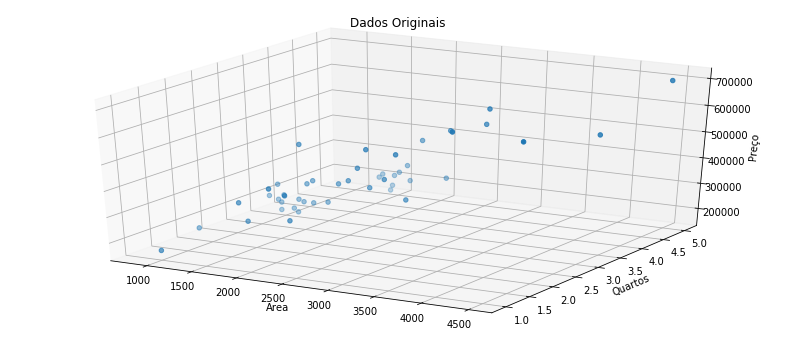

In [398]:
fig = plt.figure(figsize=(14,6))

ax = plt.axes(projection='3d')
ax.set_title('Dados Originais')
ax.set_xlabel(varX1)
ax.set_ylabel(varX2)
ax.set_zlabel(varY)
ax.scatter3D(X1, X2, y);

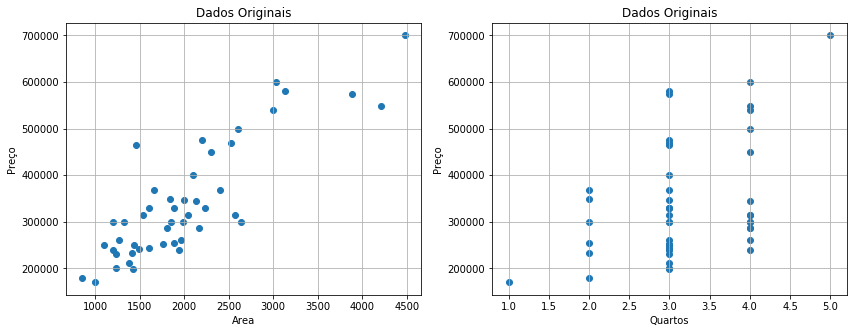

In [399]:
fig = plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.title('Dados Originais')
plt.grid()
plt.xlabel(varX1)
plt.ylabel(varY)
plt.scatter(X1, y)

plt.subplot(1,2,2)
plt.title('Dados Originais')
plt.grid()
plt.xlabel(varX2)
plt.ylabel(varY)
plt.scatter(X2, y)

plt.show()

### Etapa 3: Ajuste Manual virou Normalização!

In [400]:
def normaliza_variaveis(X):
  
  X_norm = X.copy()
  
  cols = X.shape[1]
  mu = np.mean(X, axis=0)
  sigma = np.std(X, axis=0)
  
  for col in range(cols):
      X_norm[:,col] = (X[:,col] - mu[col]) / sigma[col]
      
  return X_norm, mu, sigma

In [401]:
X = np.ones((m,n))
X[:,0] = X1
X[:,1] = X2
print(X[:5,:])

[[2.104e+03 3.000e+00]
 [1.600e+03 3.000e+00]
 [2.400e+03 3.000e+00]
 [1.416e+03 2.000e+00]
 [3.000e+03 4.000e+00]]


In [402]:
X, mu, sigma = normaliza_variaveis(X)
print(X[:5,:])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [403]:
# Construção de X

Xn = np.ones((m,3))
Xn[:,1:3] = X
X = Xn
print(X[:5,:])

# X      *    w       =   yest
# m x 3       3 x 1       m x 1

[[ 1.          0.13141542 -0.22609337]
 [ 1.         -0.5096407  -0.22609337]
 [ 1.          0.5079087  -0.22609337]
 [ 1.         -0.74367706 -1.5543919 ]
 [ 1.          1.27107075  1.10220517]]


In [404]:
# Construção de y

yn = np.zeros((m,1))
yn[:,0] = y
y = yn
print(y[:5])

# y
# m x 1

[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]]


In [405]:
# Construção de w

w = np.array([[y.mean(),0,0]]).T
print(w)

[[340412.65957447]
 [     0.        ]
 [     0.        ]]


In [406]:
yest = X.dot(w) # yest = X * w

In [407]:
print(yest[:5])

[[340412.65957447]
 [340412.65957447]
 [340412.65957447]
 [340412.65957447]
 [340412.65957447]]


#### Etapa 4: Gradient Descent

In [408]:
def calcula_Jw(X, y, w):
  yest = X.dot(w)
  erro = yest - y
  return (erro**2).mean()/2

In [409]:
def calcula_iteracoes_GD(X, y, w, alpha, iters):
  m = y.size
  mem_Jw = np.zeros((iters,1))
  
  for iter in range(iters):
    yest = X.dot(w)
    w = w - (alpha/m) * (X.T).dot(yest - y)
    mem_Jw[iter] = calcula_Jw(X, y, w)
    
  return w, mem_Jw

In [410]:
# Teste

w = np.array([[y.mean(),0,0]]).T
alpha = 0.01
iters = 2000
w,mem_Jw = calcula_iteracoes_GD(X, y, w, alpha, iters)
print(f'w = \n{w}')

w = 
[[340412.65957447]
 [109439.22578243]
 [ -6569.78416695]]


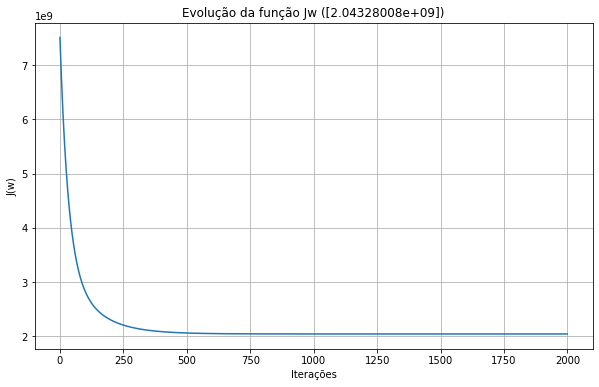

In [411]:
# Evolução

fig = plt.figure(figsize=(10,6))
plt.title(f'Evolução da função Jw ({mem_Jw[-1]})')
plt.grid()
plt.xlabel('Iterações')
plt.ylabel('J(w)')
plt.plot(range(iters), mem_Jw)
plt.show()

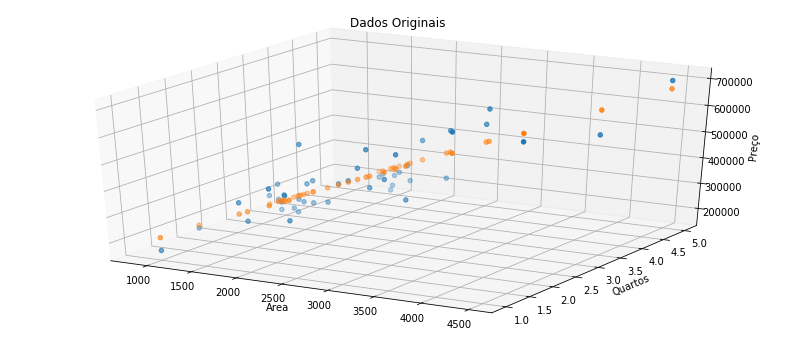

In [412]:
yest = X.dot(w)

fig = plt.figure(figsize=(14,6))

ax = plt.axes(projection='3d')
ax.set_title('Dados Originais')
ax.set_xlabel(varX1)
ax.set_ylabel(varX2)
ax.set_zlabel(varY)
ax.scatter3D(X1, X2, y);
ax.scatter3D(X1, X2, yest);